# Featuretools
Featuretools is a framework to perform automated feature engineering. It excels at transforming temporal and relational datasets into feature matrices for machine learning.

https://featuretools.alteryx.com/en/stable/index.html

In [ ]:
!pip install featuretools

In [6]:
import featuretools as ft
import pandas as pd

In [27]:
#Import mock data
data = ft.demo.load_mock_customer()

In this toy dataset, there are 3 DataFrames.

* **customers**: unique customers who had sessions

* **sessions**: unique sessions and associated attributes

* **transactions**: list of events in this session

In [28]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [29]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [30]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [31]:
df1 = pd.merge(customers_df, sessions_df, on='customer_id', how='outer')
df = pd.merge(df1, transactions_df, on='session_id', how='outer')
df.head()

,customer_id,zip_code,join_date,birthday,session_id,device,session_start,transaction_id,transaction_time,product_id,amount
0,1,60091,2011-04-17 10:48:33,1994-07-18,4,mobile,2014-01-01 00:44:25,290,2014-01-01 00:44:25,4,21.35
1,1,60091,2011-04-17 10:48:33,1994-07-18,4,mobile,2014-01-01 00:44:25,275,2014-01-01 00:45:30,5,108.11
2,1,60091,2011-04-17 10:48:33,1994-07-18,4,mobile,2014-01-01 00:44:25,101,2014-01-01 00:46:35,5,112.53
3,1,60091,2011-04-17 10:48:33,1994-07-18,4,mobile,2014-01-01 00:44:25,80,2014-01-01 00:47:40,5,6.29
4,1,60091,2011-04-17 10:48:33,1994-07-18,4,mobile,2014-01-01 00:44:25,484,2014-01-01 00:48:45,3,47.95


In [15]:
df.shape

(500, 11)

In [18]:
df.set_index('customer_id', inplace=True)

In [35]:
df.head()

,customer_id,zip_code,join_date,birthday,device,session_start,transaction_id,transaction_time,product_id,amount
0,1,60091,2011-04-17 10:48:33,1994-07-18,mobile,2014-01-01 00:44:25,290,2014-01-01 00:44:25,4,21.35
1,1,60091,2011-04-17 10:48:33,1994-07-18,mobile,2014-01-01 00:44:25,275,2014-01-01 00:45:30,5,108.11
2,1,60091,2011-04-17 10:48:33,1994-07-18,mobile,2014-01-01 00:44:25,101,2014-01-01 00:46:35,5,112.53
3,1,60091,2011-04-17 10:48:33,1994-07-18,mobile,2014-01-01 00:44:25,80,2014-01-01 00:47:40,5,6.29
4,1,60091,2011-04-17 10:48:33,1994-07-18,mobile,2014-01-01 00:44:25,484,2014-01-01 00:48:45,3,47.95


##Run Deep Feature Synthesis

In [32]:
data = {
    'customer_id':df.customer_id,
    'zip_code': df.zip_code,
    'join_date': df.join_date,
    'birthday': df.birthday,
    'device':df.device,
    'session_start':df.session_start,
    'transaction_id':df.transaction_id,
    'transaction_time':df.transaction_time,
    'product_id':df.product_id,
    'amount':df.amount
}

df = pd.DataFrame(data)


In [33]:
# Create an EntitySet
es = ft.EntitySet(id="data")


In [36]:
# Add the DataFrame to the EntitySet. Assume 'ID' is a unique identifier.
es.add_dataframe(dataframe_name="df_entity", dataframe=df, index="index")

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1910: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(


Entityset: data
  DataFrames:
    df_entity [Rows: 500, Columns: 11]
  Relationships:
    No relationships

The `max_depth` parameter determines the maximum allowed depth of the features being generated. A depth of 1 only creates new features from the provided columns, whereas a depth of 2 can create features from the features generated at depth 1, and so on.

In [38]:
# Perform deep feature synthesis
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name="df_entity",
                                max_depth=2, verbose=True)

print(features)


/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Built 22 features
Elapsed: 00:00 | Progress: 100%|██████████
       customer_id zip_code  device  transaction_id product_id  amount  \
index                                                                    
0                1    60091  mobile             290          4   21.35   
1                1    60091  mobile             275          5  108.11   
2                1    60091  mobile             101          5  112.53   
3                1    60091  mobile              80          5    6.29   
4                1    60091  mobile             484          3   47.95   
...            ...      ...     ...             ...        ...     ...   
495              5    60091  mobile              41          3   79.61   
496              5    60091  mobile             358          3   34.93   
497              5    60091  mobile             391          5   57.88   
498              5    60091  mobile              75          2   50.93   
499              5    60091  mobile             104

## Understanding Feature Output

In general, Featuretools references generated features through the feature name. In order to make features easier to understand, Featuretools offers two additional tools, `featuretools.graph_feature()` and `featuretools.describe_feature()`, to help explain what a feature is and the steps Featuretools took to generate it. Let’s look at this example feature:

In [41]:
feature = feature_defs[18]
feature

<Feature: YEAR(birthday)>

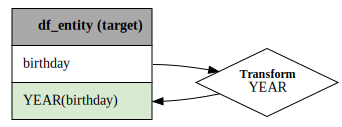

In [42]:
# Feature lineage graphs
ft.graph_feature(feature)

Feature lineage graphs visually walk through feature generation. Starting from the base data, they show step by step the primitives applied and intermediate features generated to create the final feature

In [44]:
# Feature descriptions
ft.describe_feature(feature)

'The year of the "birthday".'

Feature descriptions help to explain what a feature is, and can be further improved by including manually defined custom definitions.